In [1]:
# https://squidpy.readthedocs.io/en/stable/notebooks/tutorials/tutorial_slideseqv2.html

In [2]:
# Robert R Stickels, Evan Murray, Pawan Kumar, Jilong Li, Jamie L Marshall, Daniela J Di Bella, Paola Arlotta, Evan Z Macosko, and Fei Chen. 
# Highly sensitive spatial transcriptomics at near-cellular resolution with Slide-seqV2. Nat. Biotechnol., 2020. doi:10.1038/s41587-020-0739-1.

In [21]:
import numpy as np
import pandas as pd

import anndata as ad
import scanpy as sc
import squidpy as sq

print(f"squidpy=={sq.__version__}")

squidpy==1.6.2


In [4]:
# load the pre-processed dataset
adata = sq.datasets.slideseqv2()
adata

AnnData object with n_obs × n_vars = 41786 × 4000
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'deconvolution_results', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [5]:
# Let’s visualize cluster annotation in spatial context.

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\squidpy\pl\_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


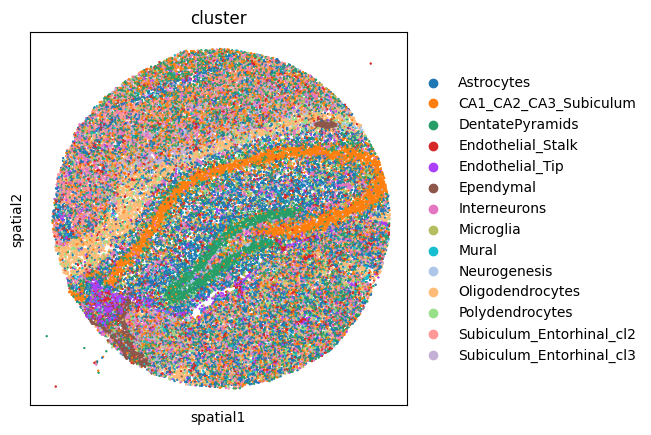

In [6]:
sq.pl.spatial_scatter(adata, color="cluster", size=1, shape=None)

In [7]:
print('''
NEIGHBOURHOOD ENRICHMENT ANALYSIS :

We can investigate spatial organization of clusters in a quantitative way, by computing a NEIGHBOURHOOD ENRICHMENT SCORE. 

It’s an enrichment score on spatial proximity of clusters: if spots belonging to two different clusters are often close to each other, 
then they will have a high score and can be defined as being ENRICHED. 

On the other hand, if they are far apart, the score will be low and they can be defined as DEPLETED. 

This score is based on a permutation-based test, and you can set the number of permutations with the n_perms argument (default is 1000).
''')


NEIGHBOURHOOD ENRICHMENT ANALYSIS :

We can investigate spatial organization of clusters in a quantitative way, by computing a NEIGHBOURHOOD ENRICHMENT SCORE. 

It’s an enrichment score on spatial proximity of clusters: if spots belonging to two different clusters are often close to each other, 
then they will have a high score and can be defined as being ENRICHED. 

On the other hand, if they are far apart, the score will be low and they can be defined as DEPLETED. 

This score is based on a permutation-based test, and you can set the number of permutations with the n_perms argument (default is 1000).



  0%|          | 0/1000 [00:00<?, ?/s]

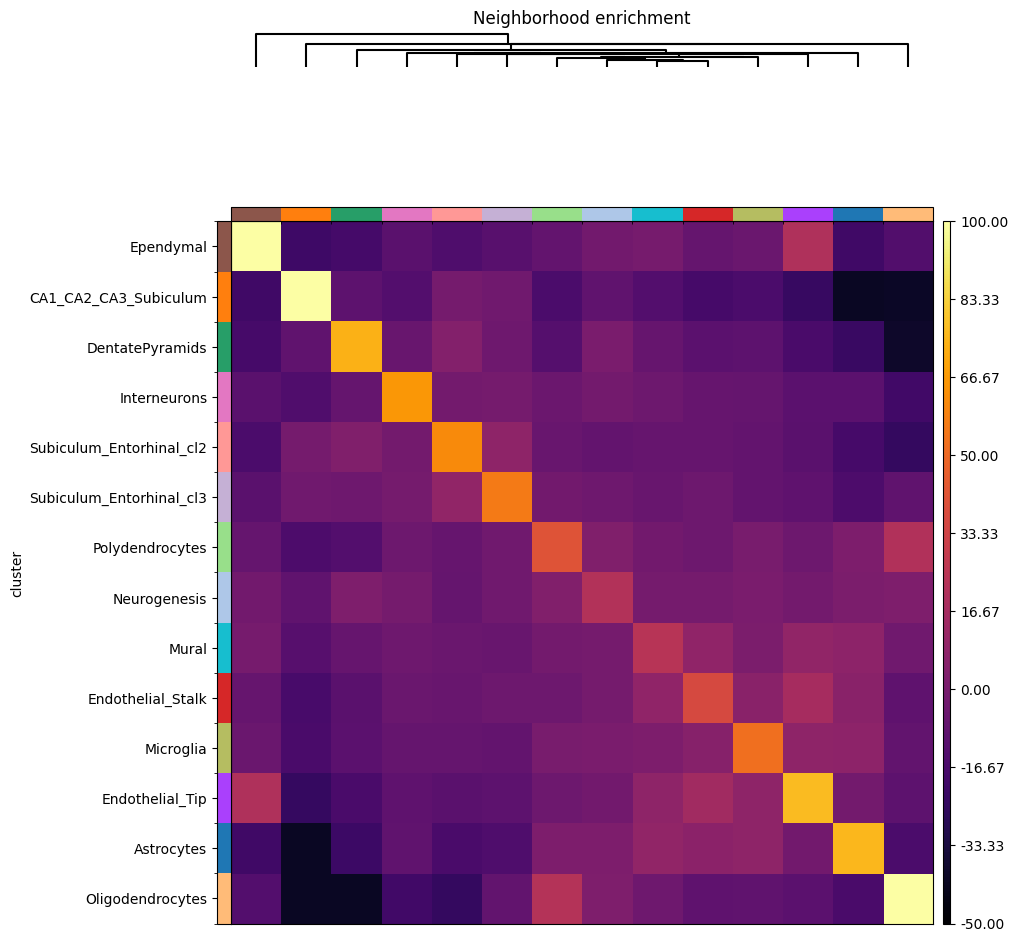

In [8]:
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="cluster")
sq.pl.nhood_enrichment(
    adata, 
    cluster_key="cluster", 
    method="single", 
    cmap="inferno", 
    vmin=-50, vmax=100
)

In [9]:
# interestingly, there seems to be an enrichment between the Endothelial_Tip, the Ependymal cells. 
# another putative enrichment is between the Oligodendrocytes and Polydendrocytes cells.

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\squidpy\pl\_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


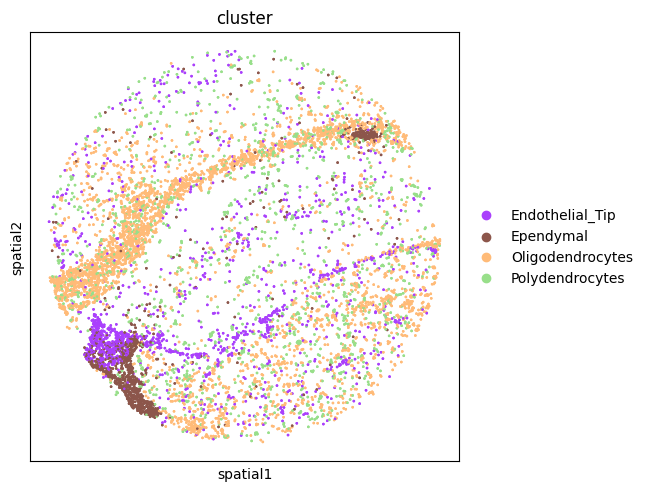

In [10]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="cluster",
    groups=["Endothelial_Tip", "Ependymal", "Oligodendrocytes", "Polydendrocytes"],
    size=3,
)

In [11]:
print("Ripley’s statistics :")

Ripley’s statistics :


In [12]:
print('''
Ripley’s statistics allow analyst to evaluate whether a discrete annotation (e.g. cell-type) appears to be clustered, dispersed or randomly distributed 
on the area of interest. 

In Squidpy, there are three closely related Ripley’s statistics, that can be easily computed with squidpy.gr.ripley(). 
Ripley’s L statistics is a variance-stabilized version of the Ripley’s K statistics. 
''')


Ripley’s statistics allow analyst to evaluate whether a discrete annotation (e.g. cell-type) appears to be clustered, dispersed or randomly distributed 
on the area of interest. 

In Squidpy, there are three closely related Ripley’s statistics, that can be easily computed with squidpy.gr.ripley(). 
Ripley’s L statistics is a variance-stabilized version of the Ripley’s K statistics. 



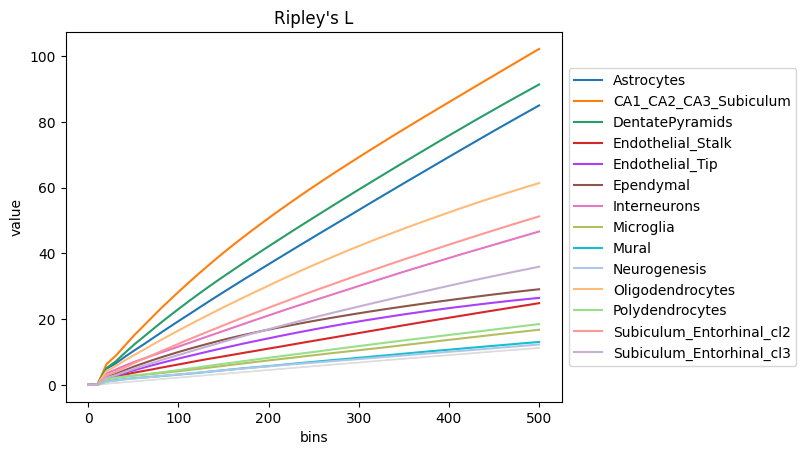

In [13]:
mode = "L"
sq.gr.ripley(adata, cluster_key="cluster", mode=mode, max_dist=500)
sq.pl.ripley(adata, cluster_key="cluster", mode=mode)

In [ ]:
mode = "K"
sq.gr.ripley(adata, cluster_key="cluster", mode=mode, max_dist=500)
sq.pl.ripley(adata, cluster_key="cluster", mode=mode)

In [14]:
# some cell-types have a more clustered pattern, like Astrocytes and CA11_CA2_CA3_Subiculum cells, 
# whereas other have a more dispersed pattern, like Mural cells.

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\squidpy\pl\_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


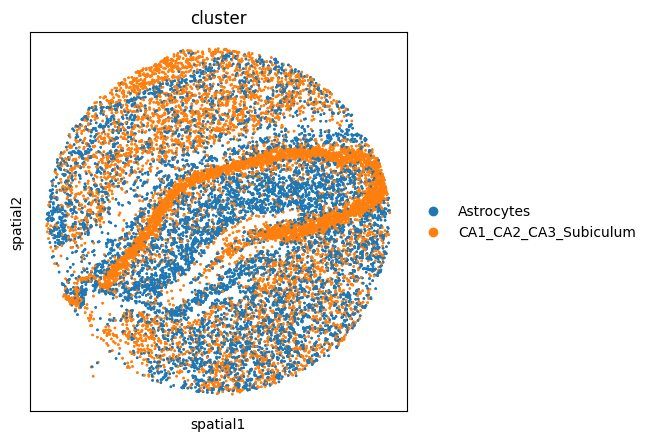

In [15]:
sq.pl.spatial_scatter(
    adata,
    color="cluster",
    groups=["CA1_CA2_CA3_Subiculum", "Astrocytes"],
    size=3,
    shape=None,
)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\squidpy\pl\_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


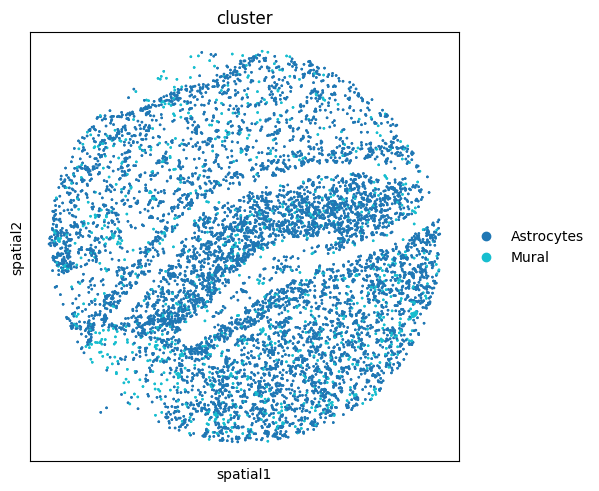

In [16]:
sq.pl.spatial_scatter(
    adata,
    color="cluster",
    groups=["Mural", "Astrocytes"],
    size=3,
    shape=None,
)

In [17]:
print("Ligand-receptor interaction analysis :")

Ligand-receptor interaction analysis :


In [18]:
# res = sq.gr.ligrec(
#    adata,
#    cluster_key="cluster",
#    interactions_params={"resources": "CellPhoneDB"},
#    n_perms=1000,
#    threshold=0.1,
#    copy=True
# )

In [19]:
print("Available clusters:", adata.obs["cluster"].unique())
print(adata.var.index[:10])  # Check the first 10 gene names

Available clusters: ['DentatePyramids', 'CA1_CA2_CA3_Subiculum', 'Subiculum_Entorhinal_cl2', 'Oligodendrocytes', 'Astrocytes', ..., 'Interneurons', 'Microglia', 'Neurogenesis', 'Polydendrocytes', 'Mural']
Length: 14
Categories (14, object): ['Astrocytes', 'CA1_CA2_CA3_Subiculum', 'DentatePyramids', 'Endothelial_Stalk', ..., 'Oligodendrocytes', 'Polydendrocytes', 'Subiculum_Entorhinal_cl2', 'Subiculum_Entorhinal_cl3']
Index(['1010001B22Rik', '1110002J07Rik', '1110017D15Rik', '1190002F15Rik',
       '1300017J02Rik', '1500012K07Rik', '1500015O10Rik', '1500017E21Rik',
       '1600002K03Rik', '1700001C02Rik'],
      dtype='object')


In [22]:
# Step 1: Load your ligand-receptor interaction file
file_LR = "interaction_input_cellphonedb_version_github.filtered2"  
interactions = pd.read_csv(file_LR, sep="\t")
print(interactions.head(2))

  protein_name_a protein_name_b
0          IFNA8          GP152
1          EPHA4          EFNB1


In [23]:
# Step 2: Rename columns to 'ligand' and 'receptor' for Squidpy compatibility

# interactions = interactions.rename(columns={
#    'protein_name_a': 'ligand',
#    'protein_name_b': 'receptor'
# })

interactions.rename(columns = {
               "protein_name_a": "source", 
               "protein_name_b": "target"}, inplace=True)

# Step 3: Inspect the DataFrame to ensure it looks correct
print(interactions.head(2))

if "source" not in interactions.columns or "target" not in interactions.columns:
    raise KeyError("The interactions DataFrame must include 'source' and 'target' columns.")

  source target
0  IFNA8  GP152
1  EPHA4  EFNB1


In [26]:
sq.gr.ligrec(
    adata,
    n_perms = 1000,                             # Number of permutations
    threshold = 0.001,                          # Minimum expression threshold
    use_raw = False,                           # Use normalized data
    interactions = interactions,               # Properly formatted DataFrame
    cluster_key = "cluster"                    # Cluster key in AnnData
)
#   clusters=["Polydendrocytes", "Oligodendrocytes"],

  0%|          | 0/1000 [00:00<?, ?permutation/s]

In [27]:
# adata.uns['ligrec']

# Check if ligand-receptor data is stored in `adata.uns`

# if "ligrec_means" in adata.uns and "ligrec_pvalues" in adata.uns:
#    print("Ligand-receptor interaction data is available.")
#    print("Interaction means matrix:")
#    print(adata.uns["ligrec_means"].head())

#    print("\nInteraction p-values matrix:")
#    print(adata.uns["ligrec_pvalues"].head())
# else:
#    print("Ligand-receptor interaction data is missing. Ensure the database was uploaded or interactions were computed.")

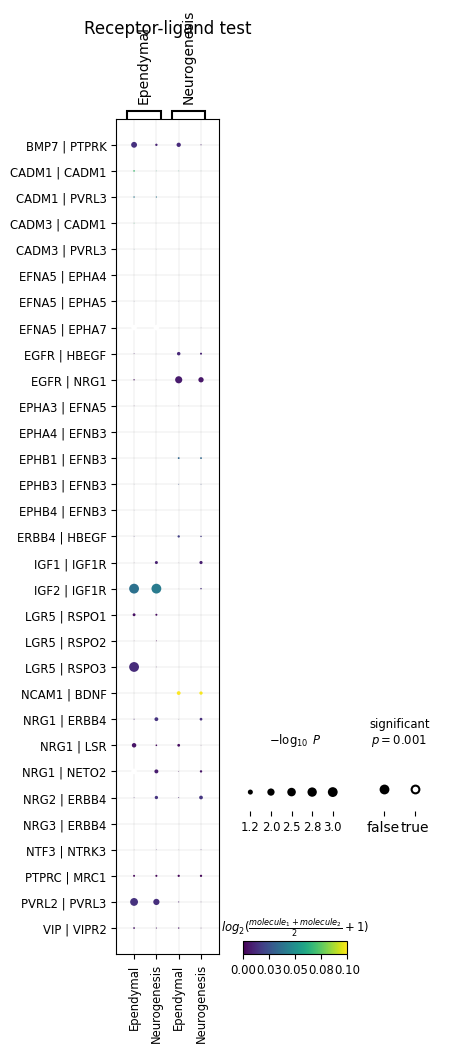

In [28]:
# Visualize ligand-receptor heatmap
sq.pl.ligrec(
    adata,
    key="ligrec",  # Key where results are stored
    cluster_key="cluster",  # Cluster key in AnnData
    top_n_ligands=5,  # Number of top ligands to show
    top_n_receivers=5,  # Number of top receptors to show
    save="Squidpy_SLIDEseq2_plot.png"  # Saves the plot
)

#   clusters=["Polydendrocytes", "Oligodendrocytes"]

In [29]:
print("Spatially variable genes with spatial autocorrelation statistics")

Spatially variable genes with spatial autocorrelation statistics


In [30]:
print('''
We can investigate spatial variability of gene expression. squidpy.gr.spatial_autocorr() conveniently wraps two spatial autocorrelation statistics: 
Moran’s I and Geary’s C*. They provide a score on the degree of spatial variability of gene expression.
''')


We can investigate spatial variability of gene expression. squidpy.gr.spatial_autocorr() conveniently wraps two spatial autocorrelation statistics: 
Moran’s I and Geary’s C*. They provide a score on the degree of spatial variability of gene expression.



In [31]:
sq.gr.spatial_autocorr(adata, mode="moran")
adata.uns["moranI"].head(10)

I  pval_norm  var_norm  pval_norm_fdr_bh
Ttr            0.705846        0.0  0.000007               0.0
Plp1           0.531659        0.0  0.000007               0.0
Hpca           0.493652        0.0  0.000007               0.0
Mbp            0.488613        0.0  0.000007               0.0
Enpp2          0.458899        0.0  0.000007               0.0
1500015O10Rik  0.458650        0.0  0.000007               0.0
Pcp4           0.429474        0.0  0.000007               0.0
Sst            0.406900        0.0  0.000007               0.0
Ptgds          0.387598        0.0  0.000007               0.0
Nrgn           0.370682        0.0  0.000007               0.0

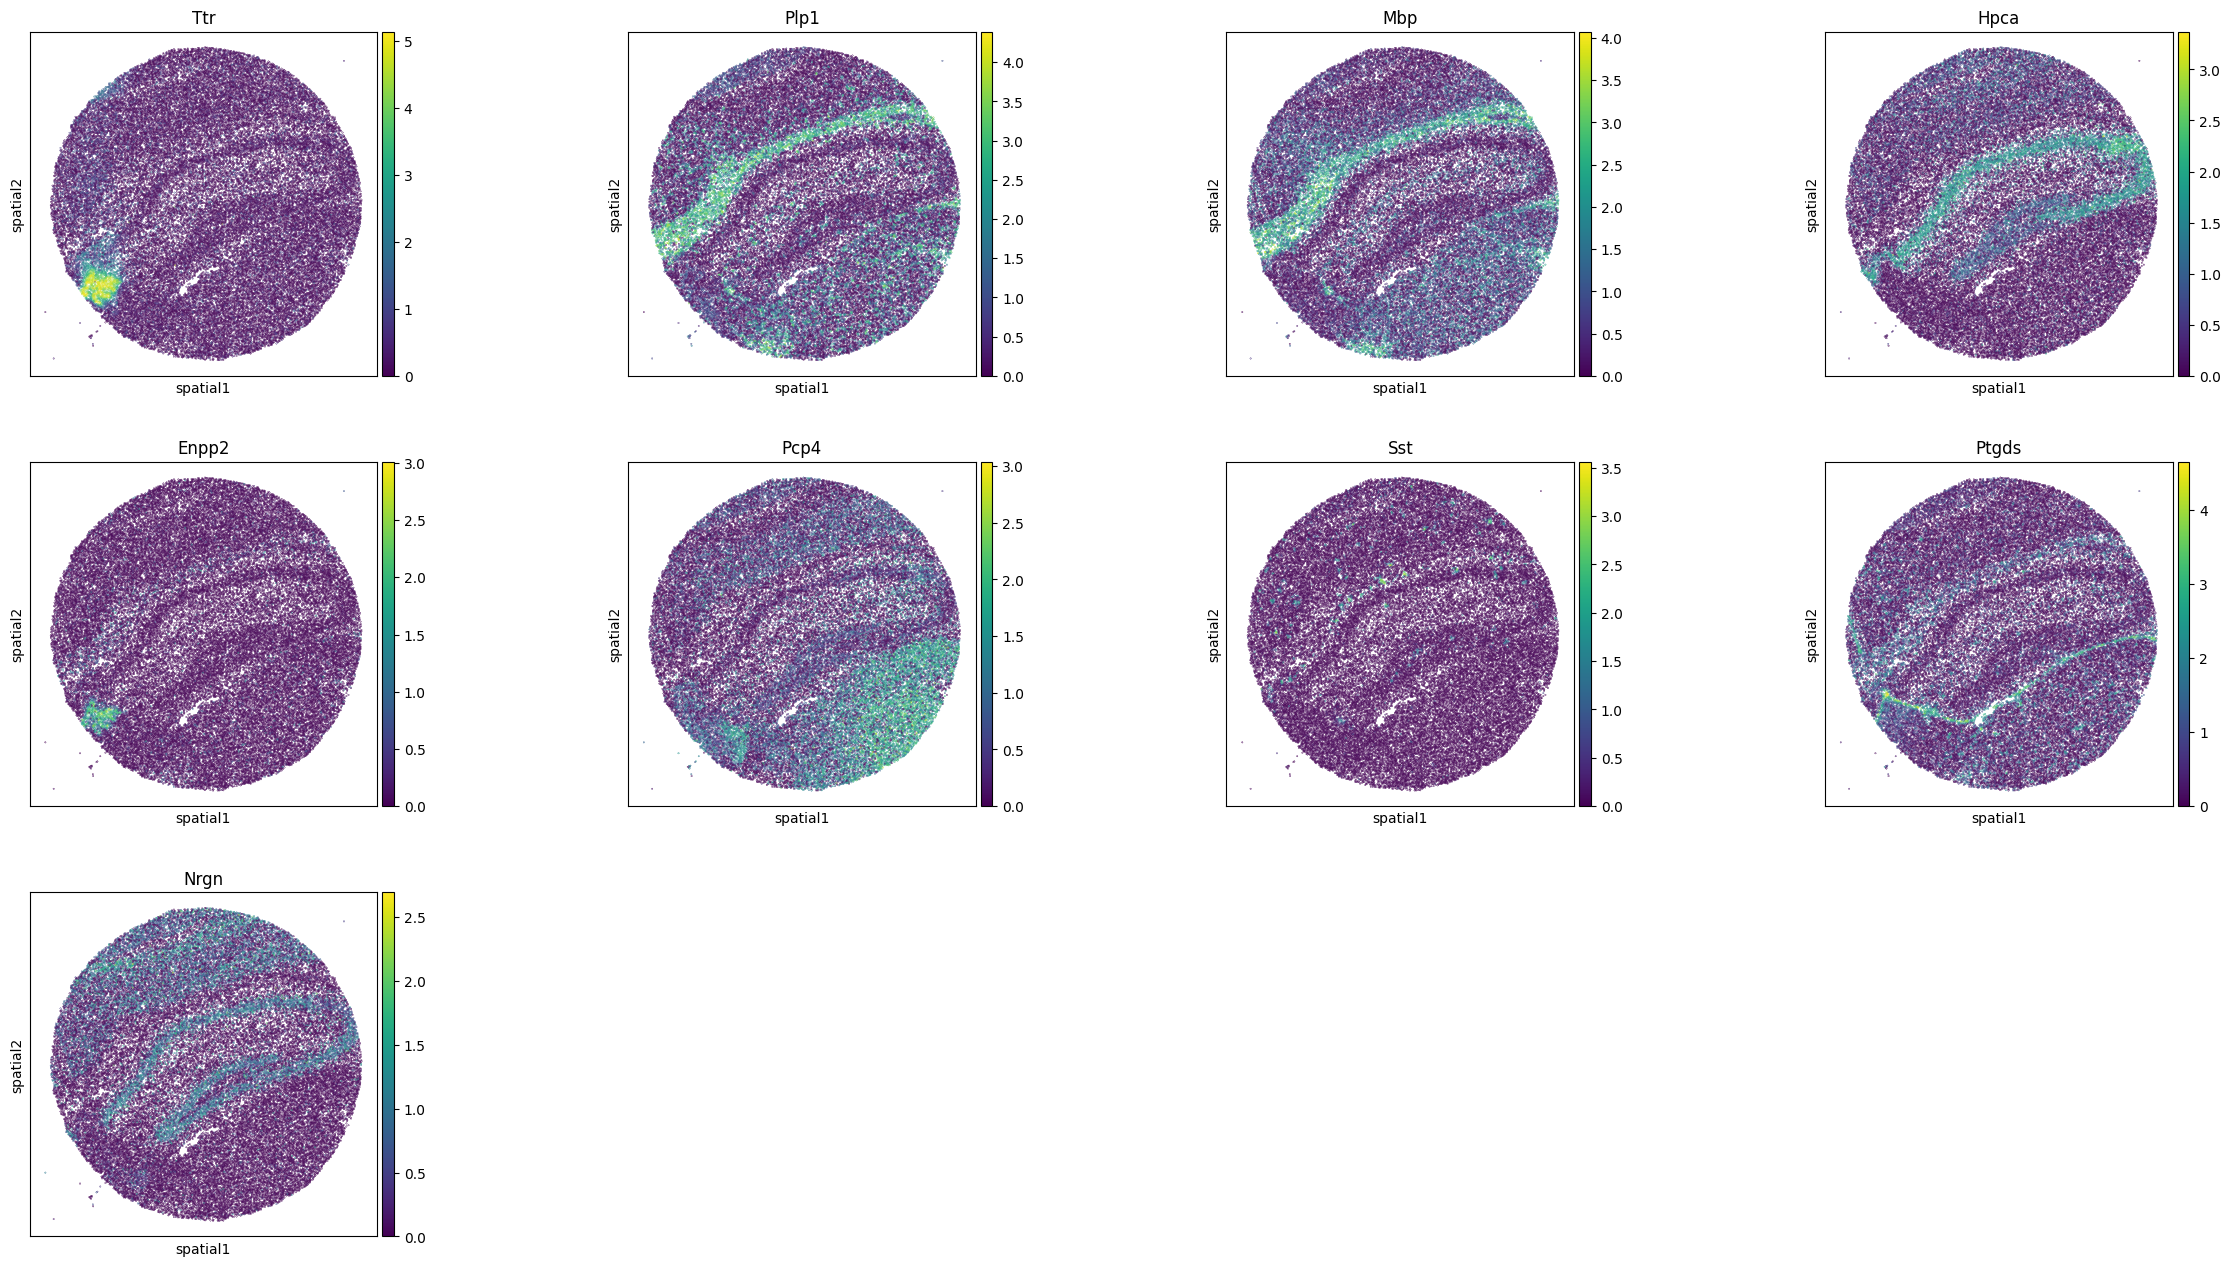

In [32]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color=["Ttr", "Plp1", "Mbp", "Hpca", "Enpp2", "Pcp4", "Sst", "Ptgds", "Nrgn"],
    size=0.1,
)

In [33]:
sq.gr.spatial_autocorr(adata, mode="geary")
adata.uns["gearyC"].head(20)

C  pval_norm  var_norm  pval_norm_fdr_bh
Ttr            0.294942        0.0  0.000007               0.0
Plp1           0.469341        0.0  0.000007               0.0
Mbp            0.505678        0.0  0.000007               0.0
Hpca           0.506666        0.0  0.000007               0.0
Enpp2          0.544104        0.0  0.000007               0.0
1500015O10Rik  0.551079        0.0  0.000007               0.0
Pcp4           0.570899        0.0  0.000007               0.0
Sst            0.601597        0.0  0.000007               0.0
Ptgds          0.613250        0.0  0.000007               0.0
Nrgn           0.631180        0.0  0.000007               0.0
Ccdc153        0.635586        0.0  0.000007               0.0
Mobp           0.641092        0.0  0.000007               0.0
Mal            0.672084        0.0  0.000007               0.0
Tac2           0.674161        0.0  0.000007               0.0
H2-Ab1         0.674241        0.0  0.000007               0.0
H2-Aa          0.680529        0.0  0.000007               0.0
Ppp3ca         0.687060        0.0  0.000007               0.0
Nwd2           0.695105        0.0  0.000007               0.0
Malat1         0.703381        0.0  0.000007               0.0
Meg3           0.706593        0.0  0.000007               0.0